In [1]:
#Import all the required dependencies
import os 
import sys
import pandas as pd

In [2]:
groupdata = os.path.abspath(os.path.join(os.getcwd(), '../Dataset/FirePredcitor4Dataset.csv'))
areaofburn = os.path.abspath(os.path.join(os.getcwd(), '../Dataset/area_burnt.csv'))
charateristics = os.path.abspath(os.path.join(os.getcwd(), '../Dataset/CharacteristicDataset.csv'))

In [3]:
charater = pd.read_csv(charateristics)
AoB =  pd.read_csv(areaofburn)

In [4]:
groupedWeather =  pd.read_csv(groupdata, low_memory = False, parse_dates=['time'])

In [5]:
charater.head()

,Date,sat,UID_Fire,Status,REF_ID,rounded_lat,rounded_lon,HHMM_mean,HHMM_std,lat_mean,...,T31_mean,T31_std,sample_mean,sample_std,FRP_mean,FRP_std,conf_mean,conf_std,type_mean,type_std
0,2010-01-12,A,313,removed,BC-2010-G40151,53.75,-124.25,2036.0,0.0,53.829,...,2.45,0.000000,1111.0,0.000000,110.7,0.000000,93.0,0.000000,0.0,0.0
1,2010-01-12,T,313,removed,BC-2010-G40151,53.75,-124.25,2024.0,0.0,53.832,...,0.15,0.000000,1252.0,0.000000,82.7,0.000000,64.0,0.000000,0.0,0.0
2,2010-01-13,A,313,removed,BC-2010-G40151,53.75,-124.25,2119.0,0.0,53.838,...,-3.55,0.424264,522.5,0.707107,63.8,18.526198,81.5,3.535534,0.0,0.0
3,2010-01-18,A,313,removed,BC-2010-G40151,53.75,-124.25,2138.0,0.0,53.845,...,-2.75,0.000000,280.0,0.000000,25.8,0.000000,63.0,0.000000,0.0,0.0
4,2010-01-22,A,211,removed,BC-2010-C10299,53.25,-123.75,2113.0,0.0,53.316,...,-3.45,0.000000,603.0,0.000000,60.5,0.000000,84.0,0.000000,0.0,0.0


In [6]:
AoB.head()

,UID_Fire,REF_ID,Date_of_Burn,Total_AoB
0,100,BC-2011-V30040,2011-05-20,0.021933
1,100,BC-2014-G80090,2014-05-31,0.107307
2,1000,AB-2014-HWF124,2014-06-29,0.255955
3,1000,AB-2015-SWF061,2015-05-22,0.022832
4,1000,AB-2016-EWF008,2016-04-08,0.010350


In [7]:
groupedWeather.head()

,Unnamed: 0,longitude,latitude,time,d2m,t2m,p140209,cvh,cvl,ptype,sst,sf,slt,sp,tp,tvh,Date,wind_speed
0,0,-131.5,60.0,2010-01-01 00:00:00,236.67915,240.27254,NaN,0.809577,0.190423,0.0,NaN,0.0,0.999985,86992.80,4.656613e-10,5.000137,2010-01-01 00:00:00,1.917265
1,1,-131.5,60.0,2010-01-01 01:00:00,235.97772,239.91673,NaN,0.809577,0.190423,0.0,NaN,0.0,0.999985,86927.85,4.656613e-10,5.000137,2010-01-01 01:00:00,1.900160
2,2,-131.5,60.0,2010-01-01 02:00:00,234.38320,238.31720,NaN,0.809577,0.190423,0.0,NaN,0.0,0.999985,86885.03,4.656613e-10,5.000137,2010-01-01 02:00:00,1.947320
3,3,-131.5,60.0,2010-01-01 03:00:00,233.81541,237.60031,NaN,0.809577,0.190423,0.0,NaN,0.0,0.999985,86831.85,4.656613e-10,5.000137,2010-01-01 03:00:00,2.144416
4,4,-131.5,60.0,2010-01-01 04:00:00,233.09224,237.02068,NaN,0.809577,0.190423,0.0,NaN,0.0,0.999985,86795.14,4.656613e-10,5.000137,2010-01-01 04:00:00,2.084922


### Deal With The Dataset And Aggrate the data based on Mean and Standard Deviation

In [8]:
#Drop the index column
groupedWeather.drop(['Unnamed: 0'], axis=1, inplace = True)

In [9]:
groupedWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30422160 entries, 0 to 30422159
Data columns (total 17 columns):
 #   Column      Dtype         
---  ------      -----         
 0   longitude   float64       
 1   latitude    float64       
 2   time        datetime64[ns]
 3   d2m         float64       
 4   t2m         float64       
 5   p140209     float64       
 6   cvh         float64       
 7   cvl         float64       
 8   ptype       float64       
 9   sst         float64       
 10  sf          float64       
 11  slt         float64       
 12  sp          float64       
 13  tp          float64       
 14  tvh         float64       
 15  Date        object        
 16  wind_speed  float64       
dtypes: datetime64[ns](1), float64(15), object(1)
memory usage: 3.9+ GB


In [10]:
#Convert to a time
groupedWeather['date'] = groupedWeather['time'].dt.date

In [11]:
groupedWeather.drop('time', axis = 1, inplace = True)

In [12]:
#Convert from kelvin to celsius (--273.15)  2-meter temperature and  2-meter dewpoint temperature 
groupedWeather['t2m'] = groupedWeather['t2m'] - 273.15
groupedWeather['d2m'] = groupedWeather['d2m'] - 273.15

The t2m and d2m data from reanalysis-era5-single-levels can help in predicting wildfire by providing information about the temperature and humidity of the atmosphere. Warmer and drier conditions are more conducive to wildfire development and spread, and these data can help inform forecasts of when and where conditions are likely to be favorable for fire ignition and growth.

In [18]:
groupedWeather.drop(['Date'], axis = 1, inplace = True)

In [19]:
WeatherData =  groupedWeather.groupby(['latitude', 'longitude','date' ], axis = 0).agg(['mean', 'std'])

In [20]:
WeatherData.columns

MultiIndex([(       'd2m', 'mean'),
            (       'd2m',  'std'),
            (       't2m', 'mean'),
            (       't2m',  'std'),
            (   'p140209', 'mean'),
            (   'p140209',  'std'),
            (       'cvh', 'mean'),
            (       'cvh',  'std'),
            (       'cvl', 'mean'),
            (       'cvl',  'std'),
            (     'ptype', 'mean'),
            (     'ptype',  'std'),
            (       'sst', 'mean'),
            (       'sst',  'std'),
            (        'sf', 'mean'),
            (        'sf',  'std'),
            (       'slt', 'mean'),
            (       'slt',  'std'),
            (        'sp', 'mean'),
            (        'sp',  'std'),
            (        'tp', 'mean'),
            (        'tp',  'std'),
            (       'tvh', 'mean'),
            (       'tvh',  'std'),
            ('wind_speed', 'mean'),
            ('wind_speed',  'std')],
           )

In [23]:
WeatherData.head()

d2m                 t2m           p140209  \
                                   mean       std      mean       std    mean   
latitude longitude date                                                         
48.5     -131.5    2010-01-01  6.687052  0.311646  8.822403  0.386394     NaN   
                   2010-01-02  3.736815  2.481040  7.697623  0.653663     NaN   
                   2010-01-03  4.335367  1.646017  8.114973  0.361893     NaN   
                   2010-01-04  8.214972  0.774187  8.983368  0.535579     NaN   
                   2010-01-05  7.603122  0.287554  8.264459  0.124763     NaN   

                                   cvh       cvl       ...  slt       \
                              std mean  std mean  std  ... mean  std   
latitude longitude date                                ...             
48.5     -131.5    2010-01-01 NaN  0.0  0.0  0.0  0.0  ...  0.0  0.0   
                   2010-01-02 NaN  0.0  0.0  0.0  0.0  ...  0.0  0.0   
                   2010-01-03 NaN  0.0  0.0  0.0  0.0  ...  0.0  0.0   
                   2010-01-04 NaN  0.0  0.0  0.0  0.0  ...  0.0  0.0   
                   2010-01-05 NaN  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                          sp                    tp            \
                                        mean         std      mean       std   
latitude longitude date                                                        
48.5     -131.5    2010-01-01   99343.671375  409.346733  0.000196  0.000453   
                   2010-01-02  101534.239417  591.817992  0.000015  0.000020   
                   2010-01-03  101839.736208  412.074621  0.000741  0.000947   
                   2010-01-04  100739.884375   92.299748  0.000616  0.000790   
                   2010-01-05  101023.617042   79.113604  0.000016  0.000015   

                               tvh      wind_speed            
                              mean  std       mean       std  
latitude longitude date                                       
48.5     -131.5    2010-01-01  0.0  0.0   8.126436  2.455344  
                   2010-01-02  0.0  0.0   6.346014  2.913991  
                   2010-01-03  0.0  0.0   9.720722  4.238074  
                   2010-01-04  0.0  0.0   9.307921  1.756212  
                   2010-01-05  0.0  0.0   6.380410  2.361058  

[5 rows x 26 columns]

In [25]:
WeatherData.columns = ['_'.join(item) for item in WeatherData]

In [27]:
WeatherData.columns

Index(['d2m_mean', 'd2m_std', 't2m_mean', 't2m_std', 'p140209_mean',
       'p140209_std', 'cvh_mean', 'cvh_std', 'cvl_mean', 'cvl_std',
       'ptype_mean', 'ptype_std', 'sst_mean', 'sst_std', 'sf_mean', 'sf_std',
       'slt_mean', 'slt_std', 'sp_mean', 'sp_std', 'tp_mean', 'tp_std',
       'tvh_mean', 'tvh_std', 'wind_speed_mean', 'wind_speed_std'],
      dtype='object')

<AxesSubplot:xlabel='latitude-longitude-date'>

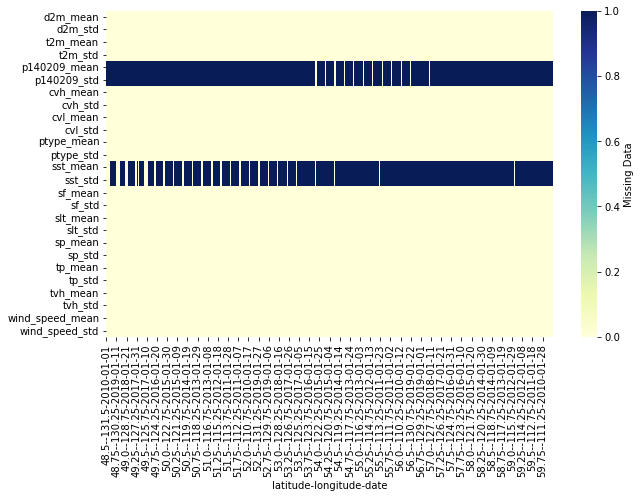

In [29]:
#Viz Missing Datas
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(WeatherData.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [31]:
#All Null So We Drop It
WeatherData.drop(['cvl_std', 'cvh_std'], axis = 1, inplace = True)

In [41]:
WeatherData.head()

d2m_mean   d2m_std  t2m_mean   t2m_std  \
latitude longitude date                                                 
48.5     -131.5    2010-01-01  6.687052  0.311646  8.822403  0.386394   
                   2010-01-02  3.736815  2.481040  7.697623  0.653663   
                   2010-01-03  4.335367  1.646017  8.114973  0.361893   
                   2010-01-04  8.214972  0.774187  8.983368  0.535579   
                   2010-01-05  7.603122  0.287554  8.264459  0.124763   

                               p140209_mean  p140209_std  cvh_mean  cvl_mean  \
latitude longitude date                                                        
48.5     -131.5    2010-01-01           NaN          NaN       0.0       0.0   
                   2010-01-02           NaN          NaN       0.0       0.0   
                   2010-01-03           NaN          NaN       0.0       0.0   
                   2010-01-04           NaN          NaN       0.0       0.0   
                   2010-01-05           NaN          NaN       0.0       0.0   

                               ptype_mean  ptype_std  ...  slt_mean  slt_std  \
latitude longitude date                               ...                      
48.5     -131.5    2010-01-01    0.833372   0.380711  ...       0.0      0.0   
                   2010-01-02    0.625029   0.494558  ...       0.0      0.0   
                   2010-01-03    0.750034   0.442346  ...       0.0      0.0   
                   2010-01-04    0.958377   0.204133  ...       0.0      0.0   
                   2010-01-05    1.000046   0.000000  ...       0.0      0.0   

                                     sp_mean      sp_std   tp_mean    tp_std  \
latitude longitude date                                                        
48.5     -131.5    2010-01-01   99343.671375  409.346733  0.000196  0.000453   
                   2010-01-02  101534.239417  591.817992  0.000015  0.000020   
                   2010-01-03  101839.736208  412.074621  0.000741  0.000947   
                   2010-01-04  100739.884375   92.299748  0.000616  0.000790   
                   2010-01-05  101023.617042   79.113604  0.000016  0.000015   

                               tvh_mean  tvh_std  wind_speed_mean  \
latitude longitude date                                             
48.5     -131.5    2010-01-01       0.0      0.0         8.126436   
                   2010-01-02       0.0      0.0         6.346014   
                   2010-01-03       0.0      0.0         9.720722   
                   2010-01-04       0.0      0.0         9.307921   
                   2010-01-05       0.0      0.0         6.380410   

                               wind_speed_std  
latitude longitude date                        
48.5     -131.5    2010-01-01        2.455344  
                   2010-01-02        2.913991  
                   2010-01-03        4.238074  
                   2010-01-04        1.756212  
                   2010-01-05        2.361058  

[5 rows x 24 columns]

In [43]:
WeatherData.to_csv('FirePredictor5Dataset.csv')

In [45]:
#Import the new Dataset
weatherdata = os.path.abspath(os.path.join(os.getcwd(), '../Dataset/FirePredictor5Dataset.csv'))
WeatherData =  pd.read_csv(weatherdata)


In [51]:
.head()

,rounded_lat,rounded_lon,date,d2m_mean,d2m_std,t2m_mean,t2m_std,p140209_mean,p140209_std,cvh_mean,...,slt_mean,slt_std,sp_mean,sp_std,tp_mean,tp_std,tvh_mean,tvh_std,wind_speed_mean,wind_speed_std
0,48.5,-131.5,2010-01-01,6.687052,0.311646,8.822403,0.386394,NaN,NaN,0.0,...,0.0,0.0,99343.671375,409.346733,0.000196,0.000453,0.0,0.0,8.126436,2.455344
1,48.5,-131.5,2010-01-02,3.736815,2.481040,7.697623,0.653663,NaN,NaN,0.0,...,0.0,0.0,101534.239417,591.817992,0.000015,0.000020,0.0,0.0,6.346014,2.913991
2,48.5,-131.5,2010-01-03,4.335367,1.646017,8.114973,0.361893,NaN,NaN,0.0,...,0.0,0.0,101839.736208,412.074621,0.000741,0.000947,0.0,0.0,9.720722,4.238074
3,48.5,-131.5,2010-01-04,8.214972,0.774187,8.983368,0.535579,NaN,NaN,0.0,...,0.0,0.0,100739.884375,92.299748,0.000616,0.000790,0.0,0.0,9.307921,1.756212
4,48.5,-131.5,2010-01-05,7.603122,0.287554,8.264459,0.124763,NaN,NaN,0.0,...,0.0,0.0,101023.617042,79.113604,0.000016,0.000015,0.0,0.0,6.380410,2.361058


In [49]:
#Merge all the dataset together
 #Rename latitude and longitude
WeatherData.rename(columns={'latitude': 'rounded_lat', 'longitude': 'rounded_lon'}, inplace = True)

In [52]:
WeatherData['date']=pd.to_datetime(WeatherData['date'])

### Merging Our Datasets

In [53]:
#Set index for all the grouping
WeatherData.set_index(['rounded_lat', 'rounded_lon'], inplace = True)

In [54]:
#Rename and good area of burn
AoB.rename(columns ={ 'Date_of_Burn': 'date'}, inplace=True )

In [55]:
AoB.set_index(['UID_Fire', 'REF_ID', 'date'], inplace = True)

In [56]:
charater.rename(columns ={'Date': 'date'}, inplace = True)

In [57]:
charater.set_index(['UID_Fire', 'REF_ID', 'date'], inplace = True)

In [58]:
#Merge First Datasets
AoB = AoB.merge(charater, on=['UID_Fire', 'REF_ID', 'date'], how='inner')
AoB.reset_index(drop=False, inplace=True)
AoB.head(3)

,UID_Fire,REF_ID,date,Total_AoB,sat,Status,rounded_lat,rounded_lon,HHMM_mean,HHMM_std,...,T31_mean,T31_std,sample_mean,sample_std,FRP_mean,FRP_std,conf_mean,conf_std,type_mean,type_std
0,100,BC-2011-V30040,2011-05-20,0.021933,A,primary,49.75,-123.0,2140.0,0.0,...,15.75,0.000000,214.0,0.000000,10.7,0.000000,32.0,0.000000,0.0,0.0
1,1000,AB-2014-HWF124,2014-06-29,0.255955,A,primary,60.00,-118.0,2005.0,0.0,...,22.65,1.131371,977.5,0.707107,7.3,2.828427,56.5,10.606602,0.0,0.0
2,1000,AB-2014-HWF124,2014-06-29,0.255955,T,primary,60.00,-118.0,1952.0,0.0,...,24.45,0.000000,1063.0,0.000000,9.7,0.000000,64.0,0.000000,0.0,0.0


In [59]:
import numpy as np
temp = AoB.set_index(['UID_Fire', 'REF_ID', 'date', 'Total_AoB', 'Status', 'sat'])
display('Duplicated fire data after merging:', np.unique(temp.index.duplicated(), return_counts=True))

'Duplicated fire data after merging:'

(array([False,  True]), array([14184,  9614]))

In [60]:
AoB_Data= AoB.groupby(['UID_Fire', 'REF_ID', 'date', 'Total_AoB', 'Status', 'sat'], 
                                                        axis=0, 
                                                        as_index=False).first()

In [61]:
#Convert the date to datetime
AoB_Data['date'] = pd.to_datetime(AoB_Data['date'])

In [62]:
AoB_Data.set_index(['rounded_lat', 'rounded_lon'],  inplace = True)

In [65]:
AoB_Data.head()

UID_Fire          REF_ID       date  Total_AoB  \
rounded_lat rounded_lon                                                   
54.25       -124.75            51  BC-2014-G40112 2014-10-24   0.245498   
51.25       -115.00            56  AB-2011-CWF240 2012-05-12   1.594830   
52.00       -123.50            68  BC-2014-C50011 2014-04-12   0.145104   
            -123.50            68  BC-2014-C50011 2014-04-12   0.145104   
51.25       -121.50            84  BC-2014-C40028 2014-04-28   0.098025   

                          Status sat  HHMM_mean  HHMM_std  lat_mean   lat_std  \
rounded_lat rounded_lon                                                         
54.25       -124.75      primary   T     2012.0       0.0    54.281  0.000000   
51.25       -115.00      primary   T     1917.0       0.0    51.160  0.005657   
52.00       -123.50      primary   A     2129.0       0.0    52.099  0.000000   
            -123.50      primary   T     1942.0       0.0    52.106  0.000000   
51.25       -121.50      primary   A     2129.0       0.0    51.193  0.000000   

                         ...  T31_mean   T31_std  sample_mean  sample_std  \
rounded_lat rounded_lon  ...                                                
54.25       -124.75      ...      2.85  0.000000       1146.0         0.0   
51.25       -115.00      ...     23.05  0.565685       1076.0         0.0   
52.00       -123.50      ...     14.35  0.000000        338.0         0.0   
            -123.50      ...     14.55  0.000000        935.0         0.0   
51.25       -121.50      ...      9.25  0.000000        265.0         0.0   

                         FRP_mean   FRP_std  conf_mean  conf_std  type_mean  \
rounded_lat rounded_lon                                                       
54.25       -124.75          19.0  0.000000       50.0  0.000000        0.0   
51.25       -115.00          13.3  0.989949       70.5  0.707107        0.0   
52.00       -123.50           8.3  0.000000       35.0  0.000000        0.0   
            -123.50          14.9  0.000000       71.0  0.000000        0.0   
51.25       -121.50         183.0  0.000000        0.0  0.000000        0.0   

                         type_std  
rounded_lat rounded_lon            
54.25       -124.75           0.0  
51.25       -115.00           0.0  
52.00       -123.50           0.0  
            -123.50           0.0  
51.25       -121.50           0.0  

[5 rows x 24 columns]

In [67]:
WeatherData.head()

date  d2m_mean   d2m_std  t2m_mean   t2m_std  \
rounded_lat rounded_lon                                                      
48.5        -131.5      2010-01-01  6.687052  0.311646  8.822403  0.386394   
            -131.5      2010-01-02  3.736815  2.481040  7.697623  0.653663   
            -131.5      2010-01-03  4.335367  1.646017  8.114973  0.361893   
            -131.5      2010-01-04  8.214972  0.774187  8.983368  0.535579   
            -131.5      2010-01-05  7.603122  0.287554  8.264459  0.124763   

                         p140209_mean  p140209_std  cvh_mean  cvl_mean  \
rounded_lat rounded_lon                                                  
48.5        -131.5                NaN          NaN       0.0       0.0   
            -131.5                NaN          NaN       0.0       0.0   
            -131.5                NaN          NaN       0.0       0.0   
            -131.5                NaN          NaN       0.0       0.0   
            -131.5                NaN          NaN       0.0       0.0   

                         ptype_mean  ...  slt_mean  slt_std        sp_mean  \
rounded_lat rounded_lon              ...                                     
48.5        -131.5         0.833372  ...       0.0      0.0   99343.671375   
            -131.5         0.625029  ...       0.0      0.0  101534.239417   
            -131.5         0.750034  ...       0.0      0.0  101839.736208   
            -131.5         0.958377  ...       0.0      0.0  100739.884375   
            -131.5         1.000046  ...       0.0      0.0  101023.617042   

                             sp_std   tp_mean    tp_std  tvh_mean  tvh_std  \
rounded_lat rounded_lon                                                      
48.5        -131.5       409.346733  0.000196  0.000453       0.0      0.0   
            -131.5       591.817992  0.000015  0.000020       0.0      0.0   
            -131.5       412.074621  0.000741  0.000947       0.0      0.0   
            -131.5        92.299748  0.000616  0.000790       0.0      0.0   
            -131.5        79.113604  0.000016  0.000015       0.0      0.0   

                         wind_speed_mean  wind_speed_std  
rounded_lat rounded_lon                                   
48.5        -131.5              8.126436        2.455344  
            -131.5              6.346014        2.913991  
            -131.5              9.720722        4.238074  
            -131.5              9.307921        1.756212  
            -131.5              6.380410        2.361058  

[5 rows x 25 columns]

In [66]:
WeatherData.columns

Index(['date', 'd2m_mean', 'd2m_std', 't2m_mean', 't2m_std', 'p140209_mean',
       'p140209_std', 'cvh_mean', 'cvl_mean', 'ptype_mean', 'ptype_std',
       'sst_mean', 'sst_std', 'sf_mean', 'sf_std', 'slt_mean', 'slt_std',
       'sp_mean', 'sp_std', 'tp_mean', 'tp_std', 'tvh_mean', 'tvh_std',
       'wind_speed_mean', 'wind_speed_std'],
      dtype='object')

In [68]:
#Remove the date from grouped data
WeatherData.drop(['date'], axis = 1, inplace = True)

In [69]:
Weather = WeatherData.merge(AoB_Data, on=['rounded_lon', 'rounded_lat' ], how='inner')

In [70]:
Weather.head()

d2m_mean   d2m_std  t2m_mean   t2m_std  p140209_mean  \
rounded_lon rounded_lat                                                         
-124.25     48.5         5.251866  1.583857  6.192056  1.389660           NaN   
            48.5         5.251866  1.583857  6.192056  1.389660           NaN   
            48.5         6.255527  0.286837  6.756782  0.396061           NaN   
            48.5         6.255527  0.286837  6.756782  0.396061           NaN   
            48.5         4.323322  1.206147  5.432946  0.680542           NaN   

                         p140209_std  cvh_mean  cvl_mean  ptype_mean  \
rounded_lon rounded_lat                                                
-124.25     48.5                 NaN       0.0       0.0    1.000046   
            48.5                 NaN       0.0       0.0    1.000046   
            48.5                 NaN       0.0       0.0    1.000046   
            48.5                 NaN       0.0       0.0    1.000046   
            48.5                 NaN       0.0       0.0    1.000046   

                         ptype_std  ...  T31_mean   T31_std  sample_mean  \
rounded_lon rounded_lat             ...                                    
-124.25     48.5               0.0  ...     31.55  0.000000        360.0   
            48.5               0.0  ...     15.40  3.606245        810.5   
            48.5               0.0  ...     31.55  0.000000        360.0   
            48.5               0.0  ...     15.40  3.606245        810.5   
            48.5               0.0  ...     31.55  0.000000        360.0   

                         sample_std  FRP_mean    FRP_std  conf_mean  \
rounded_lon rounded_lat                                               
-124.25     48.5           0.000000     138.8   0.000000      100.0   
            48.5         372.645274      75.7  97.863579       79.5   
            48.5           0.000000     138.8   0.000000      100.0   
            48.5         372.645274      75.7  97.863579       79.5   
            48.5           0.000000     138.8   0.000000      100.0   

                          conf_std  type_mean  type_std  
rounded_lon rounded_lat                                  
-124.25     48.5          0.000000        0.0       0.0  
            48.5         27.577164        0.0       0.0  
            48.5          0.000000        0.0       0.0  
            48.5         27.577164        0.0       0.0  
            48.5          0.000000        0.0       0.0  

[5 rows x 48 columns]

In [71]:
Weather.shape

(4362940, 48)

In [72]:
Weather.reset_index(drop=False, inplace=True)
Weather.set_index(['UID_Fire', 'REF_ID', ], inplace=True)
# Weather.drop(['rounded_lat', 'rounded_lon'], axis=1, inplace=True)

In [73]:
#Create Area Burnt Category ( finding the lower and upper extremes of the column )
Q1 = Weather['Total_AoB'].quantile(0.25)
median = Weather['Total_AoB'].quantile(0.5)
Q3 = Weather['Total_AoB'].quantile(0.75)
lower_extreme = Q1 - 1.5 * (Q3 - Q1) if Q1 - 1.5 * (Q3 - Q1) > 0 else 0 
upper_extreme = Q3 + 1.5 * (Q3 - Q1)

In [74]:
display(f"Q1: {Q1}", 
        f"median: {median}", 
        f"Q3: {Q3}", 
        f"lower_extreme: {lower_extreme}", 
        f"upper_extreme: {upper_extreme}")

'Q1: 0.3492000000021793'

'median: 1.8710147305133082'

'Q3: 8.652146501987437'

'lower_extreme: 0'

'upper_extreme: 21.106566254965323'

In [75]:

Weather["AoB_Category"] = ''

Weather.loc[
    (Weather['Total_AoB'] > lower_extreme) &
    (Weather['Total_AoB'] <= Q1), 'AoB_Category'] = 'Very Low'
Weather.loc[
    (Weather['Total_AoB'] > Q1) &
    (Weather['Total_AoB'] <= median), 'AoB_Category'] = 'Low'
Weather.loc[
    (Weather['Total_AoB'] > median) &
    (Weather['Total_AoB'] <= Q3), 'AoB_Category'] = 'Moderate'
Weather.loc[
    (Weather['Total_AoB'] > Q3) &
    (Weather['Total_AoB'] <= upper_extreme), 'AoB_Category'] = 'High'
Weather.loc[
    (Weather['Total_AoB'] > upper_extreme), 'AoB_Category'] = 'Very High'
Weather['AoB_Category'].value_counts()

Very Low     1091200
Moderate     1090890
Low          1090270
Very High     640150
High          450430
Name: AoB_Category, dtype: int64

In [80]:
Weather.rename(columns={'d2m_mean': '2m_dewpoint_temprature_mean' ,'d2m_std': '2m_dewpoint_temprature_std' })

rounded_lon  rounded_lat  \
UID_Fire REF_ID                                     
629      BC-2015-V60407      -124.25         48.5   
         BC-2015-V60407      -124.25         48.5   
         BC-2015-V60407      -124.25         48.5   
         BC-2015-V60407      -124.25         48.5   
         BC-2015-V60407      -124.25         48.5   
...                              ...          ...   
302      AB-2011-MWF041      -110.25         60.0   
         AB-2011-MWF041      -110.25         60.0   
         AB-2011-MWF041      -110.25         60.0   
         AB-2011-MWF041      -110.25         60.0   
         AB-2011-MWF041      -110.25         60.0   

                         2m_dewpoint_temprature_mean  \
UID_Fire REF_ID                                        
629      BC-2015-V60407                     5.251866   
         BC-2015-V60407                     5.251866   
         BC-2015-V60407                     6.255527   
         BC-2015-V60407                     6.255527   
         BC-2015-V60407                     4.323322   
...                                              ...   
302      AB-2011-MWF041                   -37.971402   
         AB-2011-MWF041                   -32.004954   
         AB-2011-MWF041                   -32.004954   
         AB-2011-MWF041                   -26.144580   
         AB-2011-MWF041                   -26.144580   

                         2m_dewpoint_temprature_std   t2m_mean   t2m_std  \
UID_Fire REF_ID                                                            
629      BC-2015-V60407                    1.583857   6.192056  1.389660   
         BC-2015-V60407                    1.583857   6.192056  1.389660   
         BC-2015-V60407                    0.286837   6.756782  0.396061   
         BC-2015-V60407                    0.286837   6.756782  0.396061   
         BC-2015-V60407                    1.206147   5.432946  0.680542   
...                                             ...        ...       ...   
302      AB-2011-MWF041                    2.405397 -34.185242  2.707482   
         AB-2011-MWF041                    2.476986 -27.809721  2.746197   
         AB-2011-MWF041                    2.476986 -27.809721  2.746197   
         AB-2011-MWF041                    0.824452 -22.872373  0.320979   
         AB-2011-MWF041                    0.824452 -22.872373  0.320979   

                         p140209_mean  p140209_std  cvh_mean  cvl_mean  ...  \
UID_Fire REF_ID                                                         ...   
629      BC-2015-V60407           NaN          NaN  0.000000  0.000000  ...   
         BC-2015-V60407           NaN          NaN  0.000000  0.000000  ...   
         BC-2015-V60407           NaN          NaN  0.000000  0.000000  ...   
         BC-2015-V60407           NaN          NaN  0.000000  0.000000  ...   
         BC-2015-V60407           NaN          NaN  0.000000  0.000000  ...   
...                               ...          ...       ...       ...  ...   
302      AB-2011-MWF041           NaN          NaN  0.994507  0.005493  ...   
         AB-2011-MWF041           NaN          NaN  0.994507  0.005493  ...   
         AB-2011-MWF041           NaN          NaN  0.994507  0.005493  ...   
         AB-2011-MWF041           NaN          NaN  0.994507  0.005493  ...   
         AB-2011-MWF041           NaN          NaN  0.994507  0.005493  ...   

                          T31_std  sample_mean  sample_std  FRP_mean  \
UID_Fire REF_ID                                                        
629      BC-2015-V60407  0.000000       360.00    0.000000     138.8   
         BC-2015-V60407  3.606245       810.50  372.645274      75.7   
         BC-2015-V60407  0.000000       360.00    0.000000     138.8   
         BC-2015-V60407  3.606245       810.50  372.645274      75.7   
         BC-2015-V60407  0.000000       360.00    0.000000     138.8   
...                           ...          ...         ...       ...   
302      AB-2

In [81]:
Weather.columns

Index(['rounded_lon', 'rounded_lat', 'd2m_mean', 'd2m_std', 't2m_mean',
       't2m_std', 'p140209_mean', 'p140209_std', 'cvh_mean', 'cvl_mean',
       'ptype_mean', 'ptype_std', 'sst_mean', 'sst_std', 'sf_mean', 'sf_std',
       'slt_mean', 'slt_std', 'sp_mean', 'sp_std', 'tp_mean', 'tp_std',
       'tvh_mean', 'tvh_std', 'wind_speed_mean', 'wind_speed_std', 'date',
       'Total_AoB', 'Status', 'sat', 'HHMM_mean', 'HHMM_std', 'lat_mean',
       'lat_std', 'lon_mean', 'lon_std', 'T21_mean', 'T21_std', 'T31_mean',
       'T31_std', 'sample_mean', 'sample_std', 'FRP_mean', 'FRP_std',
       'conf_mean', 'conf_std', 'type_mean', 'type_std', 'AoB_Category'],
      dtype='object')

In [82]:
Weather.to_csv('FirePredictor5DatasetNew.csv')